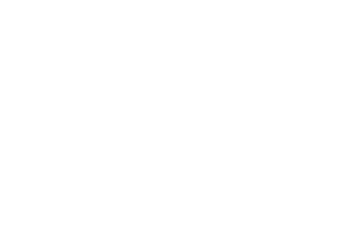

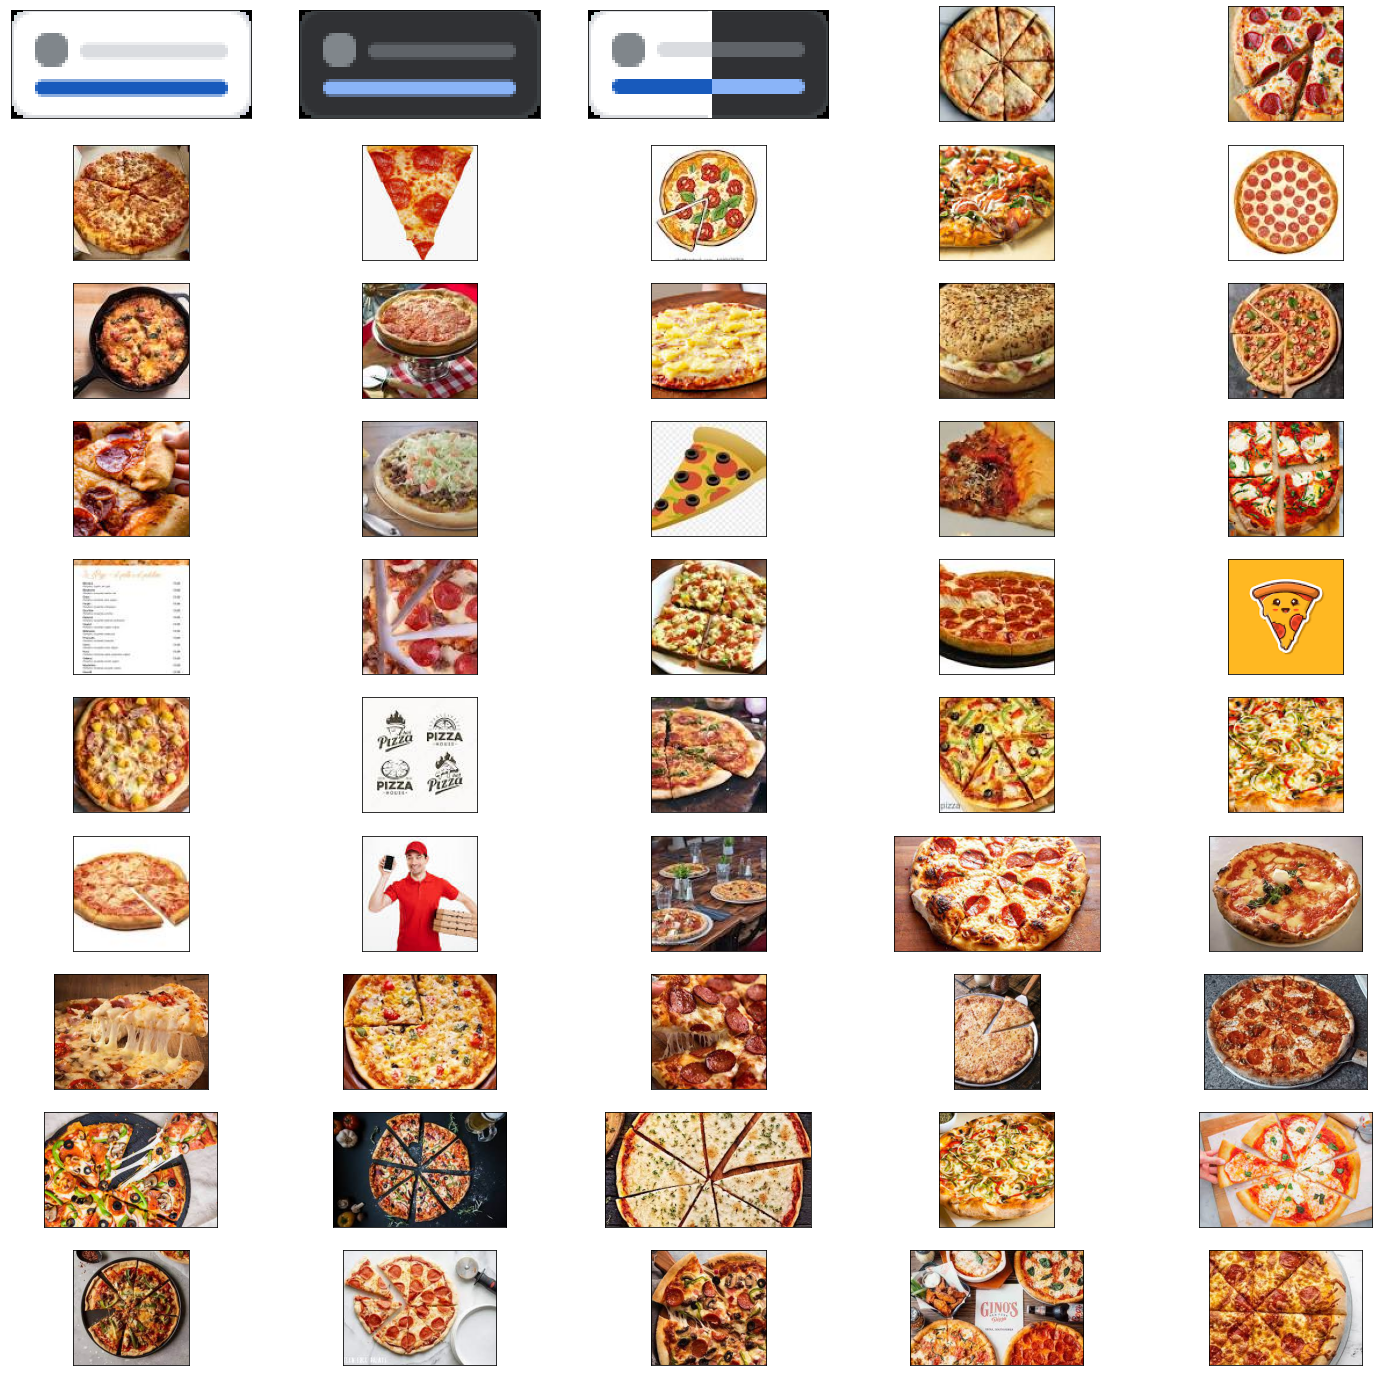

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from selenium import webdriver
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

driver_path = "chromedriver.exe"
drivers = webdriver.Chrome(executable_path=driver_path)

url ='https://www.google.com/search?q=pizza&tbm=isch&ved=2ahUKEwjZwYq1rpr1AhVSTPUHHVzoD6IQ2-cCegQIABAA&oq=pizza&gs_lcp=CgNpbWcQAzIECAAQQzIFCAAQgAQyBAgAEEMyBQgAEIAEMgQIABBDMgQIABBDMgQIABBDMgUIABCABDIECAAQQzIECAAQQ1CbDVjxtAFgk7wBaABwAHgAgAFyiAHGBpIBAzIuNpgBAKABAaoBC2d3cy13aXotaW1nsAEAwAEB&sclient=img&ei=iW3VYZnZC9KY1e8P3NC_kAo&bih=625&biw=1366'
drivers.get(url)
drivers.page_source
soup = BeautifulSoup(drivers.page_source, 'html.parser')


def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    im_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    return im_rgb


plt.axis('off')
plt.figure(figsize=(25,25))

for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(url_to_image(soup.find_all('img')[i].attrs['src']))
plt.show()

